In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df=pd.read_csv(r"C:\Users\hp\Downloads\archive (4)\uber-raw-data-aug14.csv")
df

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [105]:
df.isnull().any()
# the data has not any null values

Date/Time    False
Lat          False
Lon          False
Base         False
dtype: bool

In [106]:
df.duplicated().sum()

15882

In [107]:
df.drop_duplicates(inplace=True)

In [108]:
df

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829269,8/31/2014 23:55:00,40.7267,-73.9998,B02764
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [109]:
df.shape

(813393, 4)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813393 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  813393 non-null  object 
 1   Lat        813393 non-null  float64
 2   Lon        813393 non-null  float64
 3   Base       813393 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.0+ MB


In [111]:
df["Date/Time"]=pd.to_datetime(df["Date/Time"])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813393 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  813393 non-null  datetime64[ns]
 1   Lat        813393 non-null  float64       
 2   Lon        813393 non-null  float64       
 3   Base       813393 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.0+ MB


In [113]:
df["Day"]=df["Date/Time"].dt.day

In [119]:
df["Day"].sample()

118347    12
Name: Day, dtype: int64

In [189]:
df["Weekday"]=df["Date/Time"].dt.weekday

In [190]:
df["Hour"]=df["Date/Time"].dt.hour

In [191]:
# df["Date/Time"].dt.day_name()

In [192]:
df

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,1,4,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,1,4,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,1,4,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,1,4,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,1,4,0
...,...,...,...,...,...,...,...
829269,2014-08-31 23:55:00,40.7267,-73.9998,B02764,31,6,23
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,31,6,23
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,31,6,23
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,31,6,23


In [130]:
df.sample()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
420359,2014-08-14 20:31:00,40.7641,-73.9668,B02617,14,Thursday,20


In [131]:
df["Base"].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

# Data Visualization

(array([ 30975.,      0., 217871.,      0.,      0., 346124.,      0.,
        171396.,      0.,  47027.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

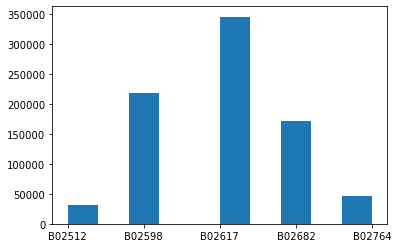

In [135]:
plt.hist(x=df["Base"])

# uber trips are rising on working days and decreasing on weekend

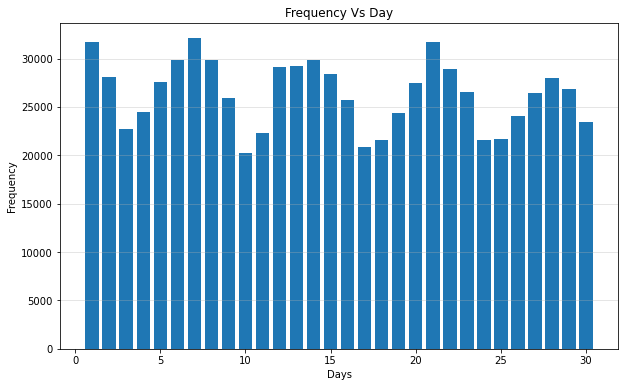

In [175]:
plt.figure(figsize=(10,6))
plt.grid(axis="y",alpha=0.4)
plt.hist(df["Day"],bins =30, rwidth = .8, range = (0.5,30.5))
plt.title("Frequency Vs Day")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='count'>

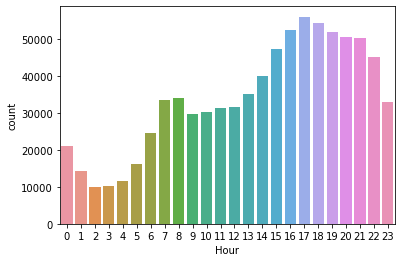

In [232]:
sns.countplot(df["Hour"])

# uber trips decreasing after mid night and increasing after 5 am to till 10 pm
#   the busy hour in between 3 pm to 9 pm 

Text(0.5, 0, 'Weekday')

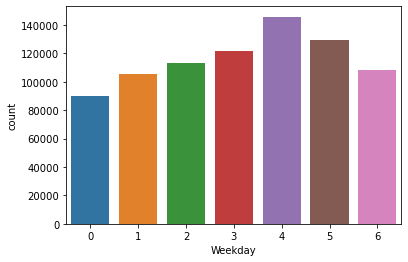

In [230]:
sns.countplot(x=df["Weekday"])
plt.xlabel("Weekday")

# 0 represent the monday , uber trips increasing in weekdays and decreasing in weekend 

# uber is very profitable on friday.

In [237]:
gp= df.groupby(['Weekday', 'Hour']).size()

In [240]:
pivot = gp.unstack()
pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,1082,677,548,1159,1807,2743,4011,5267,4980,3783,...,4499,5168,5876,6395,6017,5652,5465,4678,3495,2141
1,1097,722,494,759,1309,2228,3904,5506,5255,4121,...,5401,6256,7296,8132,7840,7135,7171,6512,4853,2853
2,1614,940,642,949,1451,2558,4463,6056,5848,4492,...,5220,6388,7552,8341,7746,7348,7579,7459,5480,3240
3,1764,1021,728,1077,1609,2445,3994,5585,5360,4458,...,5709,6798,7657,8420,8383,8339,8372,8571,7896,5611
4,3463,2024,1301,1625,2131,3038,4569,6482,6623,5407,...,7053,8630,9200,9430,9311,9038,8142,8883,9306,7890
5,5708,4128,2799,2245,1767,1785,2066,2498,3165,3800,...,6170,7352,7741,8126,8643,8331,8006,8621,9313,8020
6,6306,4689,3364,2349,1506,1444,1459,2066,2710,3590,...,5875,6760,7150,7117,6332,6062,5867,5552,4755,3216


<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

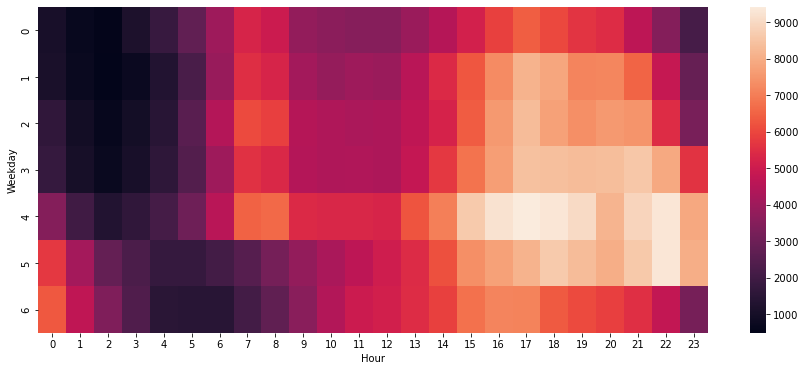

In [241]:
plt.figure(figsize=(15,6))
sns.heatmap(pivot)

In [ ]:
# on friday , 2:30 pm to 7:30 pm is very profitable for uber.

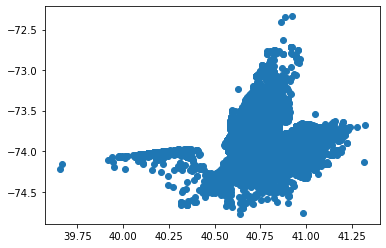

In [242]:
plt.scatter(df["Lat"],df["Lon"])

# Summary

# 1. Friday is the most profitable day for uber
# 2. On sunday less number of people use uber
# 3. 5 pm is the very busiest time for uber
# 4. On average a rise in Uber trips start around 5 am.

In [243]:
df.shape

(813393, 7)